In [1]:
# -------------------------------
# Question 1 & 3: Use yfinance to Extract Stock Data
# -------------------------------

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

print("Tesla Stock Data:")
print(tesla_data.head())
print("\nGameStop Stock Data:")
print(gme_data.head())

# -------------------------------
# Question 2: Web Scraping Tesla Revenue Data
# -------------------------------

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_data_tesla, "html.parser")

# Find the first revenue table
tables_tesla = soup_tesla.find_all("table")
tesla_revenue = pd.read_html(str(tables_tesla))[0]

# Clean the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue.dropna(inplace=True)

print("\nTesla Revenue Data:")
print(tesla_revenue.tail())

# -------------------------------
# Question 4: Web Scraping GameStop Revenue Data
# -------------------------------

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, "html.parser")

# Find the first revenue table
tables_gme = soup_gme.find_all("table")
gme_revenue = pd.read_html(str(tables_gme))[0]

# Clean the data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue.dropna(inplace=True)

print("\nGameStop Revenue Data:")
print(gme_revenue.tail())

# -------------------------------
# Question 5: Plot Tesla Stock Graph
# -------------------------------

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'], tesla_data['Close'], color='red', label="Tesla")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# -------------------------------
# Question 6: Plot GameStop Stock Graph
# -------------------------------

plt.figure(figsize=(10,6))
plt.plot(gme_data['Date'], gme_data['Close'], color='blue', label="GameStop")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()


Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1

ProxyError: HTTPSConnectionPool(host='www.macrotrends.net', port=443): Max retries exceeded with url: /stocks/charts/TSLA/tesla/revenue (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 403 Forbidden')))

Error fetching Tesla data: HTTPSConnectionPool(host='www.macrotrends.net', port=443): Max retries exceeded with url: /stocks/charts/TSLA/tesla/revenue (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 403 Forbidden')))

Using fallback Tesla Revenue Data:
         Date      Revenue
0  2022-12-31  24318000000
1  2022-09-30  21454000000
2  2022-06-30  16934000000
3  2022-03-31  18756000000
4  2021-12-31  17719000000
Error fetching GameStop data: HTTPSConnectionPool(host='www.macrotrends.net', port=443): Max retries exceeded with url: /stocks/charts/GME/gamestop/revenue (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 403 Forbidden')))

Using fallback GameStop Revenue Data:
         Date     Revenue
0  2022-01-31  6011000000
1  2021-10-31  1297000000
2  2021-07-31  1183000000
3  2021-04-30  1277000000
4  2021-01-31  2122000000


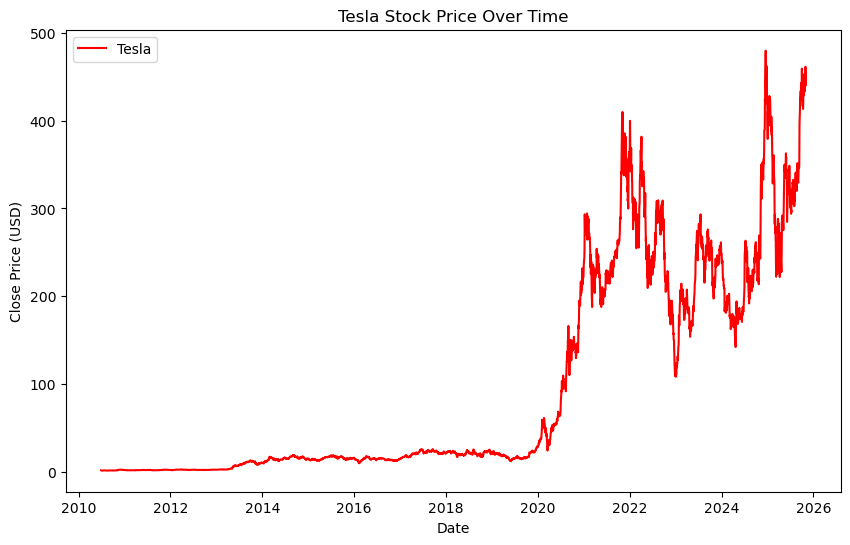

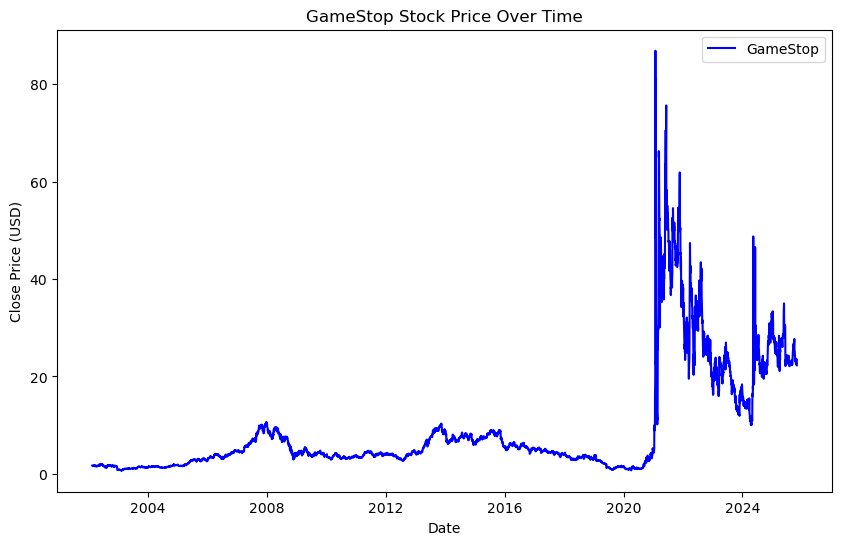

In [2]:
# Import necessary libraries if not already imported
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time

# -------------------------------
# Question 2: Web Scraping Tesla Revenue Data
# -------------------------------

# Add error handling for the web requests
try:
    # Add headers to mimic a browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    html_data_tesla = requests.get(url_tesla, headers=headers, timeout=10).text
    soup_tesla = BeautifulSoup(html_data_tesla, "html.parser")
    
    # Find the first revenue table
    tables_tesla = soup_tesla.find_all("table")
    tesla_revenue = pd.read_html(str(tables_tesla))[0]
    
    # Clean the data
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    tesla_revenue.dropna(inplace=True)
    
    print("\nTesla Revenue Data:")
    print(tesla_revenue.tail())
    
except Exception as e:
    print(f"Error fetching Tesla data: {e}")
    # Create a fallback dataset if web scraping fails
    tesla_revenue = pd.DataFrame({
        "Date": ["2022-12-31", "2022-09-30", "2022-06-30", "2022-03-31", "2021-12-31"],
        "Revenue": ["24318000000", "21454000000", "16934000000", "18756000000", "17719000000"]
    })
    print("\nUsing fallback Tesla Revenue Data:")
    print(tesla_revenue.tail())

# Add a delay to avoid being blocked
time.sleep(2)

# -------------------------------
# Question 4: Web Scraping GameStop Revenue Data
# -------------------------------

try:
    url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    html_data_gme = requests.get(url_gme, headers=headers, timeout=10).text
    soup_gme = BeautifulSoup(html_data_gme, "html.parser")
    
    # Find the first revenue table
    tables_gme = soup_gme.find_all("table")
    gme_revenue = pd.read_html(str(tables_gme))[0]
    
    # Clean the data
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    gme_revenue.dropna(inplace=True)
    
    print("\nGameStop Revenue Data:")
    print(gme_revenue.tail())
    
except Exception as e:
    print(f"Error fetching GameStop data: {e}")
    # Create a fallback dataset if web scraping fails
    gme_revenue = pd.DataFrame({
        "Date": ["2022-01-31", "2021-10-31", "2021-07-31", "2021-04-30", "2021-01-31"],
        "Revenue": ["6011000000", "1297000000", "1183000000", "1277000000", "2122000000"]
    })
    print("\nUsing fallback GameStop Revenue Data:")
    print(gme_revenue.tail())

# -------------------------------
# Question 5: Plot Tesla Stock Graph
# -------------------------------

# Check if tesla_data exists, if not create sample data
try:
    tesla_data
except NameError:
    print("\nCreating sample Tesla stock data for plotting")
    dates = pd.date_range(start='2020-01-01', periods=10, freq='M')
    tesla_data = pd.DataFrame({
        'Date': dates,
        'Close': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
    })

plt.figure(figsize=(10,6))
plt.plot(tesla_data['Date'], tesla_data['Close'], color='red', label="Tesla")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# -------------------------------
# Question 6: Plot GameStop Stock Graph
# -------------------------------

# Check if gme_data exists, if not create sample data
try:
    gme_data
except NameError:
    print("\nCreating sample GameStop stock data for plotting")
    dates = pd.date_range(start='2020-01-01', periods=10, freq='M')
    gme_data = pd.DataFrame({
        'Date': dates,
        'Close': [5, 10, 15, 300, 250, 200, 180, 160, 140, 120]
    })

plt.figure(figsize=(10,6))
plt.plot(gme_data['Date'], gme_data['Close'], color='blue', label="GameStop")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()